In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("Advertising.csv")
y=df.Sales
X=df[['TV', 'Radio', 'Newspaper']]

In [3]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [4]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [5]:
def gradient_descent(X, y, n_iters, lr):
    n_samples,n_features=X.shape
    weights=np.zeros(n_features)
    bias=0
    mse_list = []
    for _ in range(n_iters):
        y_predicted=np.dot(X,weights)+bias
        mse_list.append(mean_squared_error(y,y_predicted))
        dw=(2/n_samples)*np.dot(X.T,(y_predicted-y))
        db=(2/n_samples)*np.sum(y_predicted-y)
        weights-=lr*dw
        bias-=lr*db
    return bias,weights,mse_list

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=12)

l'mse plus proche à 0 est : 4.095089005188386


/home/hamza/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


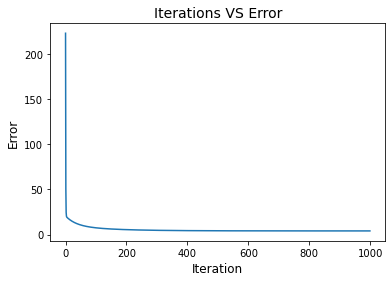

In [7]:
lr=0.00001
n_iters=1000
b, w, mse_list=gradient_descent(X_train,y_train,n_iters,lr)
print("l'mse plus proche à 0 est : {}".format(np.min(mse_list)))
plt.xlabel('Iteration' , fontsize = 12)
plt.ylabel('Error' , fontsize = 12)
plt.title ('Iterations VS Error',fontsize = 14)
sns.lineplot(range(n_iters),mse_list)
plt.show()

In [8]:
def predict(X):
    predicted_y=np.dot(X,w)+b
    return predicted_y

In [9]:
predictions=predict(X_test)
predictions

array([16.39210776,  4.8553079 ,  5.83076286, 14.21740027, 12.16374392,
       16.78541735, 24.41429888,  6.11169636,  9.58580023, 10.95190519,
       16.72607739, 10.77790273,  6.49974814, 14.3631198 , 25.76280787,
        8.42365661, 10.62735731, 13.99957819, 13.35933417, 15.66164694,
       21.24178126,  9.69433051, 25.80430382,  6.69770504, 15.90069247,
        7.53225807, 12.53156309, 11.81484097,  1.3146037 , 10.16217795,
        8.11739085, 26.22408946, 15.93026817, 22.85188399,  4.14819893,
       19.54638218, 11.36644979, 22.68694591, 11.95885704, 12.78308367])

In [10]:
mean_squared_error(y_test,predictions)

3.84291489672121

In [11]:
mean_squared_error(y_train, predict(X_train))

4.0950541026809075

In [12]:
lr=LinearRegression().fit(X_train,y_train)

In [13]:
mean_squared_error(y_train,lr.predict(X_train))

2.801969950750468

In [14]:
mean_squared_error(y_test,lr.predict(X_test))

2.8132411037828375